In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
import time
from datetime import datetime
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | saint-philippe
Processing Record 2 of Set 13 | barrow
Processing Record 3 of Set 13 | hailar
Processing Record 4 of Set 13 | jamestown
Processing Record 5 of Set 13 | tupa
Processing Record 6 of Set 13 | ilulissat
Processing Record 7 of Set 13 | tezu
Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | talnakh
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | havelock
Processing Record 12 of Set 13 | sitka
Processing Record 13 of Set 13 | touros
Processing Record 14 of Set 13 | pacific grove
Processing Record 15 of Set 13 | egvekinot
Processing Record 16 of Set 13 | konstantinovka
Processing Record 17 of Set 13 | mataura
Processing Record 18 of Set 13 | taraz
Processing Record 19 of Set 13 | tomatlan
Processing Record 20 of Set 13 | worland
Processing Record 21 of Set 13 | lichtenburg
Processing Record 22 of Set 13 | guerrero negro
Processing Record 23 o

Processing Record 36 of Set 16 | palora
Processing Record 37 of Set 16 | saraland
Processing Record 38 of Set 16 | sovetskiy
Processing Record 39 of Set 16 | huayucachi
Processing Record 40 of Set 16 | taoudenni
Processing Record 41 of Set 16 | ingham
Processing Record 42 of Set 16 | anjozorobe
Processing Record 43 of Set 16 | zhuhai
Processing Record 44 of Set 16 | boende
Processing Record 45 of Set 16 | luau
Processing Record 46 of Set 16 | sydney
Processing Record 47 of Set 16 | lebu
Processing Record 48 of Set 16 | provideniya
Processing Record 49 of Set 16 | kambove
Processing Record 50 of Set 16 | tagusao
Processing Record 1 of Set 17 | avera
Processing Record 2 of Set 17 | santa lucia
Processing Record 3 of Set 17 | marsh harbour
Processing Record 4 of Set 17 | fortuna
Processing Record 5 of Set 17 | quatre cocos
Processing Record 6 of Set 17 | severo-kurilsk
Processing Record 7 of Set 17 | karaul
City not found. Skipping...
Processing Record 8 of Set 17 | keti bandar
Processing

Processing Record 19 of Set 20 | addanki
Processing Record 20 of Set 20 | calvia
Processing Record 21 of Set 20 | hasaki
Processing Record 22 of Set 20 | mpika
Processing Record 23 of Set 20 | kemijarvi
Processing Record 24 of Set 20 | great falls
Processing Record 25 of Set 20 | oktyabrskoye
Processing Record 26 of Set 20 | lavrentiya
Processing Record 27 of Set 20 | raisio
Processing Record 28 of Set 20 | pevek
Processing Record 29 of Set 20 | faanui
Processing Record 30 of Set 20 | marquette
Processing Record 31 of Set 20 | aswan
Processing Record 32 of Set 20 | billings
Processing Record 33 of Set 20 | yaring
Processing Record 34 of Set 20 | biak
Processing Record 35 of Set 20 | goundam
Processing Record 36 of Set 20 | ketchikan
Processing Record 37 of Set 20 | voloshka
Processing Record 38 of Set 20 | catuday
Processing Record 39 of Set 20 | ajdabiya
Processing Record 40 of Set 20 | aklavik
Processing Record 41 of Set 20 | sorvag
City not found. Skipping...
Processing Record 42 of

Processing Record 1 of Set 24 | korla
Processing Record 2 of Set 24 | vardo
Processing Record 3 of Set 24 | kungurtug
Processing Record 4 of Set 24 | saint-georges
Processing Record 5 of Set 24 | mangan
Processing Record 6 of Set 24 | ahipara
Processing Record 7 of Set 24 | virginia beach
Processing Record 8 of Set 24 | mao
Processing Record 9 of Set 24 | sawtell
Processing Record 10 of Set 24 | yuryevets
Processing Record 11 of Set 24 | leningradskiy
Processing Record 12 of Set 24 | pasighat
Processing Record 13 of Set 24 | tanout
Processing Record 14 of Set 24 | chulumani
Processing Record 15 of Set 24 | mountain home
Processing Record 16 of Set 24 | tyumentsevo
Processing Record 17 of Set 24 | tambopata
Processing Record 18 of Set 24 | bam
Processing Record 19 of Set 24 | kruisfontein
Processing Record 20 of Set 24 | aripuana
Processing Record 21 of Set 24 | banamba
Processing Record 22 of Set 24 | lompoc
Processing Record 23 of Set 24 | bacolod
Processing Record 24 of Set 24 | russ

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,72.99,78,29,1.83,RE,2022-04-28 00:05:09
1,Barrow,71.2906,-156.7887,6.82,78,100,11.50,US,2022-04-28 00:05:09
2,Hailar,49.2000,119.7000,41.74,29,12,7.90,CN,2022-04-28 00:05:09
3,Jamestown,42.0970,-79.2353,31.59,75,100,13.80,US,2022-04-28 00:02:38
4,Tupa,-21.9347,-50.5136,73.40,60,26,7.36,BR,2022-04-28 00:05:10
5,Ilulissat,69.2167,-51.1000,32.02,80,100,9.22,GL,2022-04-28 00:05:10
6,Tezu,27.9167,96.1667,70.39,66,77,3.38,IN,2022-04-28 00:05:10
7,Atuona,-9.8000,-139.0333,79.07,75,20,21.32,PF,2022-04-28 00:05:11
8,Talnakh,69.4865,88.3972,33.21,97,100,14.45,RU,2022-04-28 00:05:11
9,Rikitea,-23.1203,-134.9692,77.27,68,13,23.67,PF,2022-04-28 00:04:06


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-04-28 00:05:09,-21.3585,55.7679,72.99,78,29,1.83
1,Barrow,US,2022-04-28 00:05:09,71.2906,-156.7887,6.82,78,100,11.50
2,Hailar,CN,2022-04-28 00:05:09,49.2000,119.7000,41.74,29,12,7.90
3,Jamestown,US,2022-04-28 00:02:38,42.0970,-79.2353,31.59,75,100,13.80
4,Tupa,BR,2022-04-28 00:05:10,-21.9347,-50.5136,73.40,60,26,7.36
5,Ilulissat,GL,2022-04-28 00:05:10,69.2167,-51.1000,32.02,80,100,9.22
6,Tezu,IN,2022-04-28 00:05:10,27.9167,96.1667,70.39,66,77,3.38
7,Atuona,PF,2022-04-28 00:05:11,-9.8000,-139.0333,79.07,75,20,21.32
8,Talnakh,RU,2022-04-28 00:05:11,69.4865,88.3972,33.21,97,100,14.45
9,Rikitea,PF,2022-04-28 00:04:06,-23.1203,-134.9692,77.27,68,13,23.67


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

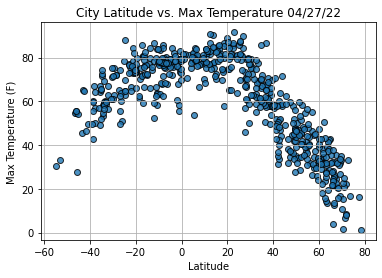

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

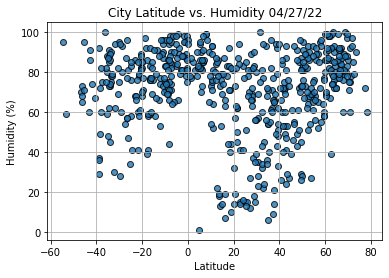

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


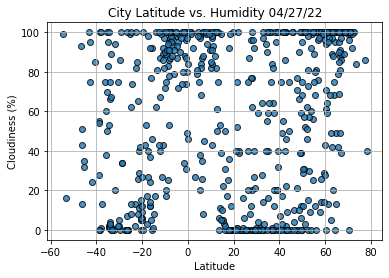

In [17]:
# Build the scatter plots for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

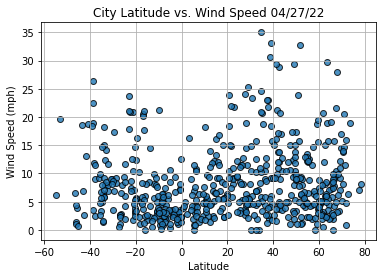

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()